In [1]:
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
import vaetorch
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
from torchvision.datasets import FashionMNIST

In [3]:
from spiral import spiral_pts

In [4]:
_pts, _, _labs = spiral_pts(3, 100)

In [5]:
reload(vaetorch)

<module 'vaetorch' from '/Users/lorenzo/GitHub/VAEMusings/vaetorch.py'>

In [6]:
#_data = vaetorch.get_datasets()
#_data = vaetorch.DummyDataset(5, 4)

In [7]:
_data = vaetorch.make_tensor_dataset(_pts)

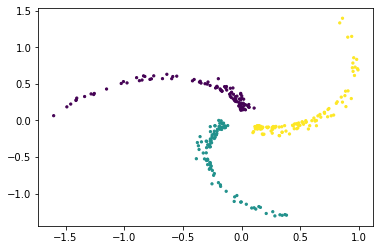

In [8]:
plt.scatter(_pts[:, 0], _pts[:, 1], s=5, c=_labs)

In [9]:
def plot_model(model, data, n_samples=100, seed=321):
    torch.manual_seed(seed)
    latent_dims = model.latent_dims
    zs = torch.randn(n_samples, latent_dims)
    xs = model.generator.sample(zs).detach().numpy()
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].scatter(xs[:, 0], xs[:, 1], s=5, c="g")
    axs[0].set_title("Sampled")
    axs[1].scatter(data[:, 0], data[:, 1], s=5, c="k")
    axs[1].set_title("Original")
    return {"figure": fig, "latents": zs, "sampled": xs}

In [10]:
reload(vaetorch)

<module 'vaetorch' from '/Users/lorenzo/GitHub/VAEMusings/vaetorch.py'>

In [11]:
def make_vae(n_mc=7):
    latent_dim = 2
    visible_dim = 2
    generator_μ_arch = {
        "input_dims": latent_dim,
        "layer_units": [100, 100, 100, visible_dim],
        "activations": ["relu", "relu", "relu", "identity"],
        "name": "gen_μ",
    }
    generator_σ_arch = {
        "input_dims": latent_dim,
        "layer_units": [3, visible_dim],
        "activations": ["relu", "none"],
        "name": "gen_σ",
    }
    generator_architecture = {"μ": generator_μ_arch,
                              "log_σ": generator_σ_arch,
                             }
    recognition_μ_arch = {
        "input_dims": visible_dim,
        "layer_units": [100, 100, 100, latent_dim],
        "activations": ["relu", "relu", "relu", "identity"],
        "name": "rec_μ",
    }
    recognition_σ_arch = {
        "input_dims": visible_dim,
        "layer_units": [3, latent_dim],
        "activations": ["relu", "none"],
        "name": "rec_σ",
    }
    recognition_architecture = {"μ": recognition_μ_arch,
                              "log_σ": recognition_σ_arch,
                             }
    architectures = {"generator": generator_architecture,
                     "recognition": recognition_architecture,
                     "optimizer": "adam",
                     "n_mc_samples": n_mc,
                     "optimizer_options": {"lr": 0.01}
                    }
    return vaetorch.make_vae(**architectures)
    #     generator = vaetorch.make_prob_ffwd(generator_architecture)
#     recognition = vaetorch.make_prob_ffwd(recognition_architecture)
#     return vaetorch.VAE(generator, recognition, torch.optim.Adam,
#                         n_mc_samples=n_mc, lr=0.0001)


In [12]:
_vae = make_vae()

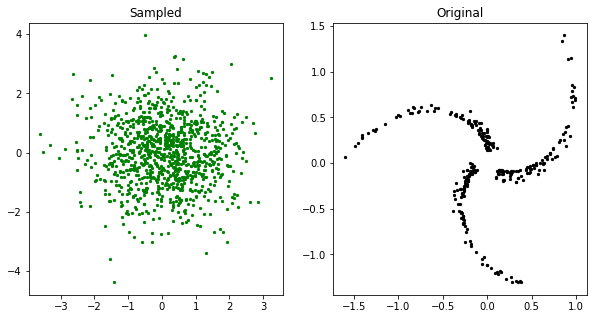

In [13]:
_fig_in = plot_model(_vae, _pts, n_samples=1000)

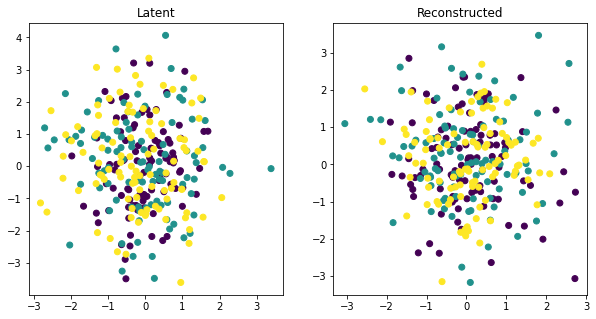

In [14]:
_vae.plot_latent(_pts, labels=_labs)

In [15]:
_vae.fit(_data, batch_size=128, epochs=1000)

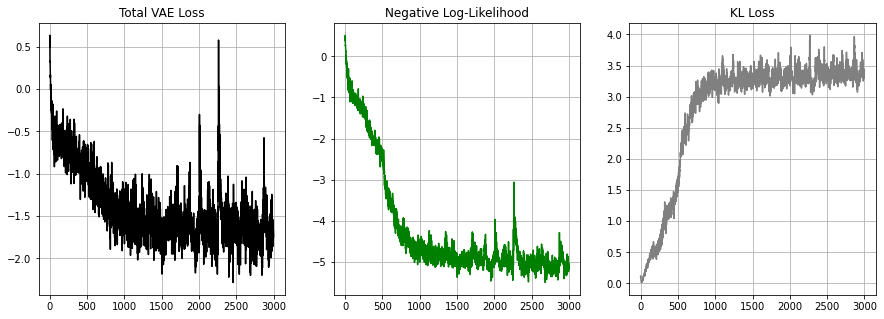

In [16]:
_ = _vae.plot_losses()

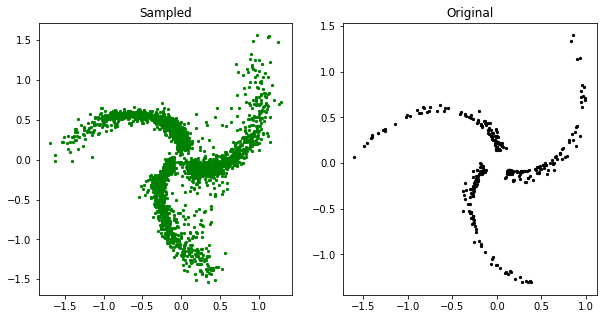

In [17]:
_fig_out = plot_model(_vae, _pts, n_samples=3000)

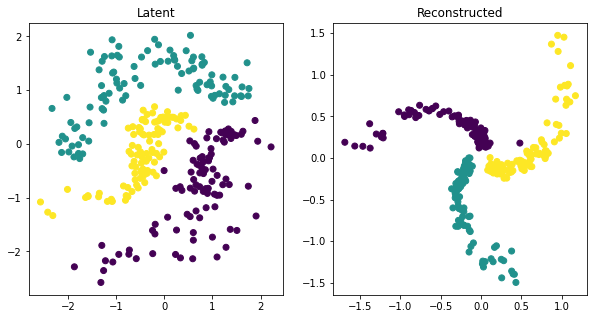

In [18]:
_vae.plot_latent(_pts, labels=_labs)